In [176]:
# Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import seaborn as sns

## 1. Reviewing and preprocessing the data

In [210]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
PassengerId = test["PassengerId"]

In [178]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [179]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

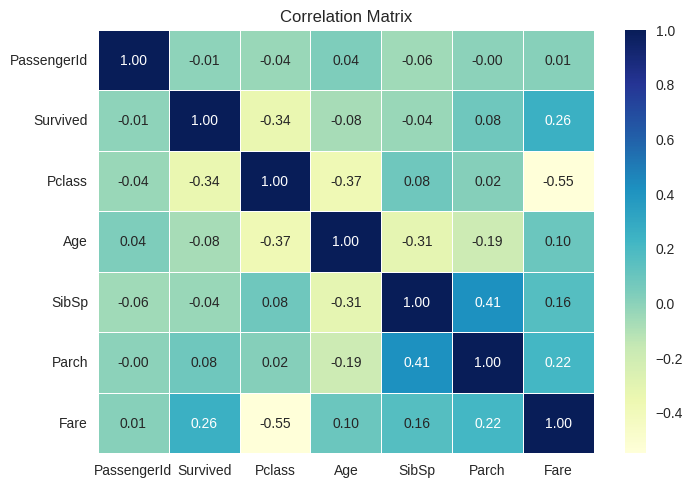

In [180]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix,
           annot=True,
           cmap="YlGnBu",
           linewidths=.5,
           fmt="0.2f")
plt.title("Correlation Matrix");

In [181]:
def clean(data):
    drop_list = ["Name", "PassengerId", "Ticket", "Cabin"]
    for x in drop_list:
        data.drop(x, inplace=True, axis=1)
    data["Embarked"].fillna("S", inplace=True)
    data["Age"].fillna(data.Age.mean(), inplace=True)

In [182]:
clean(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [183]:
clean(test)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [184]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [185]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [186]:
categroical_features = ["Pclass", "Sex", "Embarked"]
X = train.drop("Survived", axis=1)
y = train["Survived"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categroical_features)], remainder="passthrough"
)
transformed = transformer.fit_transform(X)
transformed

array([[ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

In [187]:
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.2, random_state=42)

In [188]:
X_train

array([[  1.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,  28.5   ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  13.    ],
       [  0.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [  0.    ,   0.    ,   1.    , ...,   2.    ,   0.    ,  14.1083],
       [  1.    ,   0.    ,   0.    , ...,   1.    ,   2.    , 120.    ],
       [  1.    ,   0.    ,   0.    , ...,   0.    ,   1.    ,  77.2875]])

## 2. Model Choosing

In [189]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    models_scores ={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

In [190]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7988826815642458,
 'KNN': 0.7150837988826816,
 'Random Forest': 0.8212290502793296}

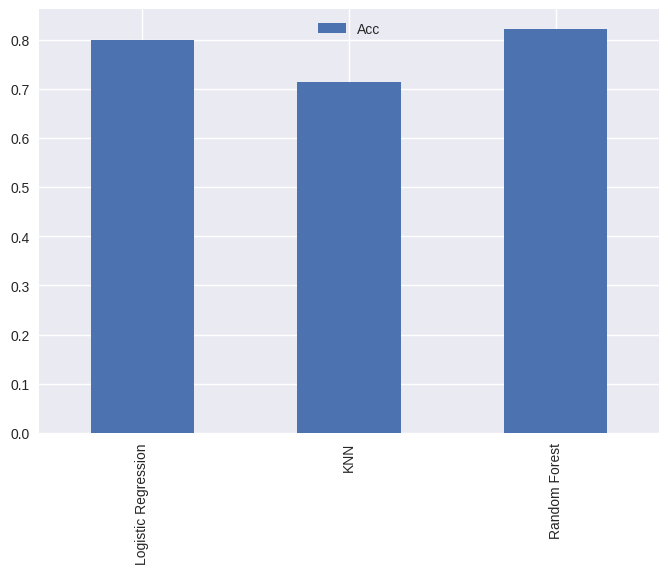

In [191]:
model_compare = pd.DataFrame(model_scores, index=["Acc"])
model_compare.T.plot.bar();

## Tunning the models

In [192]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(2, 20, 20)
}

In [193]:
# Tune LogistigRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=100,
                               verbose=2)

# Fit Random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
preds = rs_log_reg.predict(X_test)

/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.0s
[CV] END ...............C=0.00026366508987303583, penalty=l1; total time=   0.0s
[CV] END ...............C=0.0002636650898730358

/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

[CV] END ....................C=1.623776739188721, penalty=l2; total time=   0.0s
[CV] END ....................C=1.623776739188721, penalty=l2; total time=   0.0s
[CV] END ....................C=1.623776739188721, penalty=l2; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l1; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l1; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l1; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l1; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l1; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l2; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l2; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l2; total time=   0.0s
[CV] END ....................C=4.281332398719396, penalty=l2; total time=   0.0s
[CV] END ...................

/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fadlalla/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [194]:
pd.DataFrame(classification_report(y_test, preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.803571,0.776119,0.793296,0.789845,0.792223
recall,0.857143,0.702703,0.793296,0.779923,0.793296
f1-score,0.829493,0.737589,0.793296,0.783541,0.791499
support,105.000000,74.000000,0.793296,179.000000,179.000000


In [195]:
rs_log_reg.score(X_test, y_test)

0.7932960893854749

In [196]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=100,
                          verbose=2)

rs_rf.fit(X_train, y_train)
preds = rs_rf.predict(X_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimator

[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=16, n_estimators=810; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=16, n_estimators=810; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=16, n_estimators=810; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=560; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=560; total time=   

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=560; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=560; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=18, n_estimators=11

[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=510; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=710; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=710; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=710; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimat

[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=960; total time=   

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=12, n_estimators=4

In [197]:
pd.DataFrame(classification_report(y_test, preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.803419,0.822581,0.810056,0.813000,0.811340
recall,0.895238,0.689189,0.810056,0.792214,0.810056
f1-score,0.846847,0.750000,0.810056,0.798423,0.806810
support,105.000000,74.000000,0.810056,179.000000,179.000000


In [198]:
rs_rf.score(X_test, y_test)

0.8100558659217877

In [199]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 73.18%


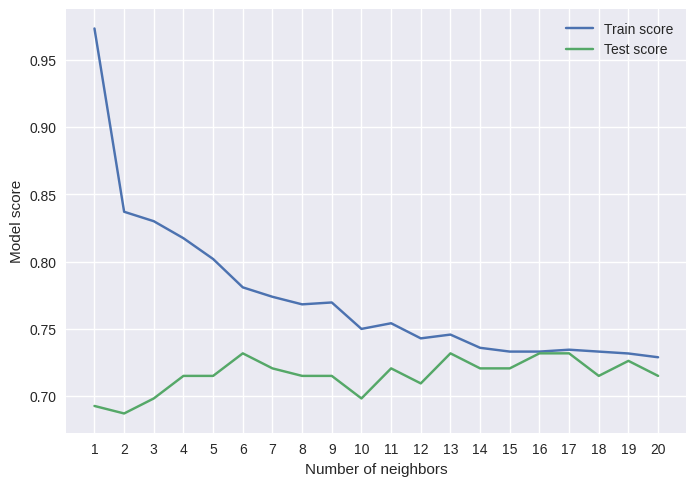

In [200]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1, 21, 1))
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

In [201]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=100,
                          verbose=2)

rs_rf.fit(transformed, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=510; total time=   0.3s
[CV] END max_depth=3, min_samples

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=310; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimator

[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=16, n_estimators=810; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=16, n_estimators=810; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=16, n_estimators=810; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=760; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=560; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=560; total time=   

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=560; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=560; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=860; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=18, n_estimators=11

[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=510; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=860; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=710; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=710; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimators=710; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=12, n_estimat

[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=14, n_estimators=310; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=610; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=12, n_estimators=960; total time=   

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=410; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=12, n_estimators=460; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=12, n_estimators=46

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([2]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [202]:
test["Fare"].fillna(test.Fare.mean(), inplace=True)
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [203]:
final = transformer.fit_transform(test)

In [204]:
final.shape

(418, 12)

In [205]:
preds = rs_rf.predict(final)

In [211]:
submission = pd.DataFrame({"PassengerId": PassengerId,
                         "Survived": preds})

In [212]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [214]:
submission.to_csv("submission.csv", index=False)